# Evaluation

## Init

In [ ]:
# general imports:
import os
import importlib
from torch import nn, cuda
from torch import optim
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# my imports (reload all modules):

from data.dataset import load_data_deep_crack
from models.unet_resnet34 import UNetResNet34
from models.unet_swin import UNetSwin
from models.unet import UNet
from training.metrics import DiceLoss
from training.train import train
from utils import save_model_files
from utils import log_training_result


import data.dataset
import models.unet_resnet34
import models.unet_swin
import models.unet
import training.metrics
import training.train
import utils

importlib.reload(data.dataset)
importlib.reload(models.unet_resnet34)
importlib.reload(models.unet_swin)
importlib.reload(models.unet)
importlib.reload(training.metrics)
importlib.reload(training.train)
importlib.reload(utils)

os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
print(f'Number of visible CUDA devices: {cuda.device_count()}')
cuda.is_available()
# NOTE: when referring to a CUDA device, torch will only know about visible devices
#       so while currently we will be using gpu05
#       this will be device `cuda:0`

# LOAD THE DATA
data_source ='../../DeepCrack/dataset/DeepCrack'
train_image_dir = data_source + '/train_img'
train_mask_dir = data_source + '/train_lab'
test_image_dir = data_source + '/test_img'
test_mask_dir = data_source + '/test_lab'
train_dl, val_dl, train_dataset, val_dataset = load_data_deep_crack(train_image_dir, train_mask_dir, [0.8, 0.2], limit_im_nr=10)
test_dl, _, test_dataset, _ = load_data_deep_crack(test_image_dir, test_mask_dir, [1, 0])

c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Number of visible CUDA devices: 1
This gives us 240 train and 60 validation samples.
This gives us 237 train and 0 validation samples.


c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\torch\utils\data\dataset.py:473: UserWarning: Length of split at index 1 is 0. This might result in an empty dataset.
  warnings.warn(


## Unet with SWIN

In [2]:
model = UNetSwin(   img_channels = 3,
                mask_channels = 1,
                base_channel_size = 64)  
loss = DiceLoss()

dice_idcs = list(np.load('../saved_models/swin_1/dice_idcs.npy'))
epoch_dice_idcs = list(np.load('../saved_models/swin_1/epoch_dice_idcs.npy'))
val_dice_idcs = list(np.load('../saved_models/swin_1/val_dice_idcs.npy'))
train_loss = list(np.load('../saved_models/swin_1/train_loss.npy'))
val_loss = list(np.load('../saved_models/swin_1/val_loss.npy'))
best_model_wts = {}
model.load_state_dict(torch.load('../saved_models/swin_1/model_state_epoch_99.pth', weights_only=True))

<All keys matched successfully>

Loss

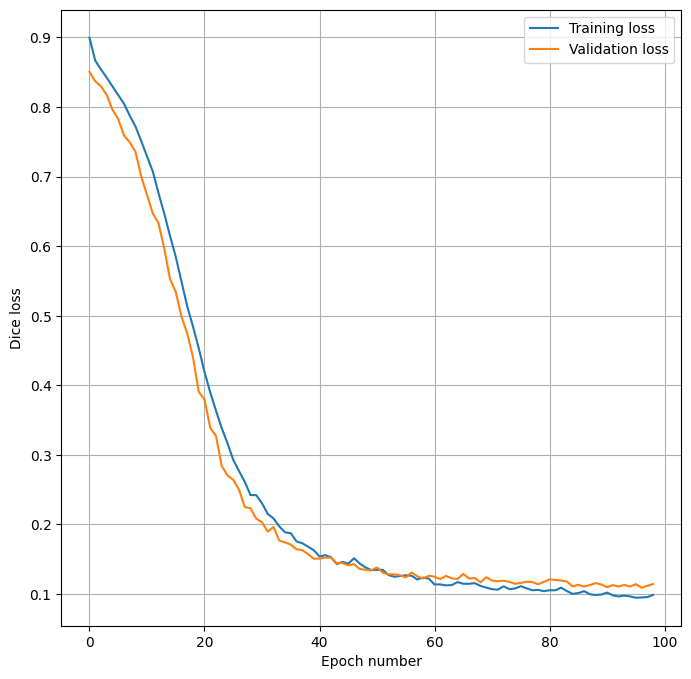

In [3]:
plt.figure(figsize = (8, 8))
plt.plot(train_loss)
plt.plot(val_loss)
plt.grid()

plt.xlabel('Epoch number')
plt.ylabel('Dice loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

In [13]:
import data.dataset
importlib.reload(data.dataset)
test_dl, _, test_dataset, _ = load_data_deep_crack(test_image_dir, test_mask_dir, [1, 0])

This gives us 237 train and 0 validation samples.


C:\Users\Csaba\AppData\Local\Temp\ipykernel_17748\4031419251.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_plot = np.array(img).transpose(1, 2, 0)
C:\Users\Csaba\AppData\Local\Temp\ipykernel_17748\4031419251.py:8: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  mask_plot = np.array(mask).transpose(1, 2, 0)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6225708].


getitem
(384, 544, 3)
(384, 544)
11215-8.jpg


C:\Users\Csaba\AppData\Local\Temp\ipykernel_17748\4031419251.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_plot = np.array(img).transpose(1, 2, 0)
C:\Users\Csaba\AppData\Local\Temp\ipykernel_17748\4031419251.py:8: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  mask_plot = np.array(mask).transpose(1, 2, 0)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.3585434].


getitem
(384, 544, 3)
(384, 544)
IMG_6472-1.jpg


C:\Users\Csaba\AppData\Local\Temp\ipykernel_17748\4031419251.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_plot = np.array(img).transpose(1, 2, 0)
C:\Users\Csaba\AppData\Local\Temp\ipykernel_17748\4031419251.py:8: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  mask_plot = np.array(mask).transpose(1, 2, 0)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4134204].


getitem
(384, 544, 3)
(384, 544)
11302-1.jpg


C:\Users\Csaba\AppData\Local\Temp\ipykernel_17748\4031419251.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_plot = np.array(img).transpose(1, 2, 0)
C:\Users\Csaba\AppData\Local\Temp\ipykernel_17748\4031419251.py:8: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  mask_plot = np.array(mask).transpose(1, 2, 0)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.3959913].


getitem
(384, 544, 3)
(384, 544)
11240-4.jpg


C:\Users\Csaba\AppData\Local\Temp\ipykernel_17748\4031419251.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  img_plot = np.array(img).transpose(1, 2, 0)
C:\Users\Csaba\AppData\Local\Temp\ipykernel_17748\4031419251.py:8: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  mask_plot = np.array(mask).transpose(1, 2, 0)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.7511111].


getitem
(384, 544, 3)
(384, 544)
11289-2.jpg


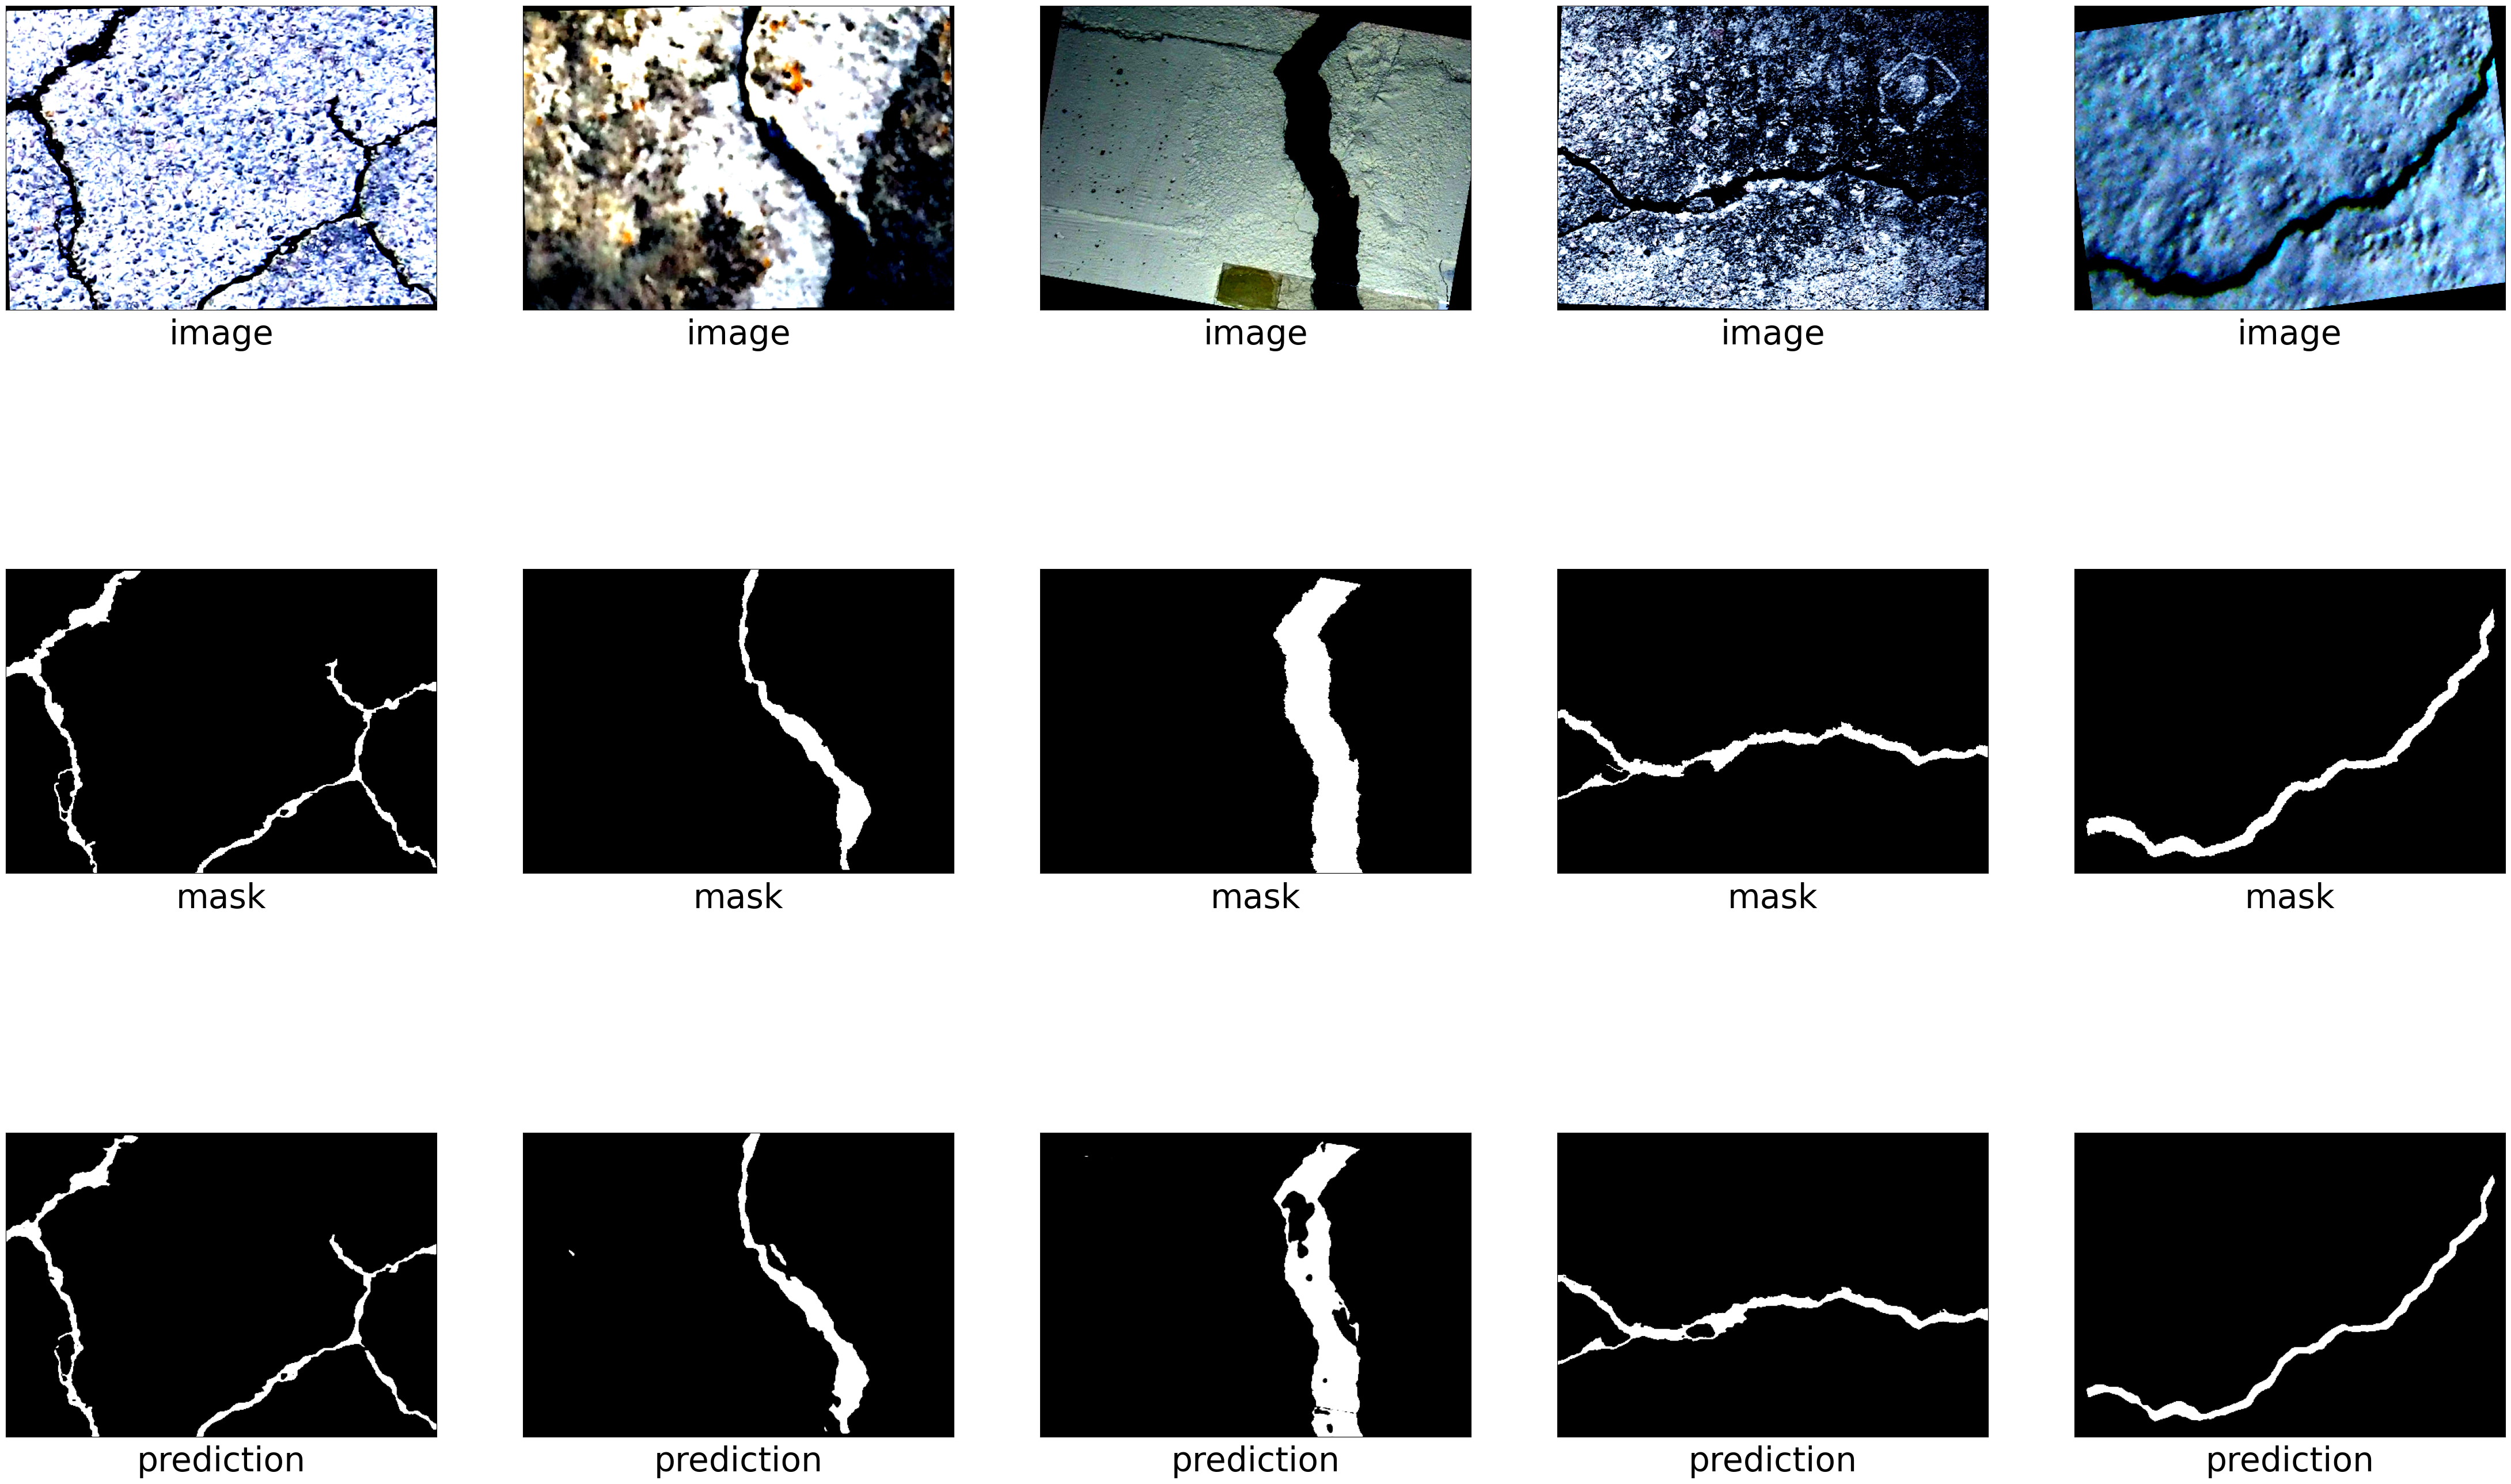

In [15]:
# visualising model predictions
fig = plt.figure(figsize = (56, 36))
for i in range(5):
    bundle = test_dataset[i]  # this triggers __getitem__ and prints should work
    img = bundle['image']
    mask = bundle['mask']
    img_plot = np.array(img).transpose(1, 2, 0)
    mask_plot = np.array(mask).transpose(1, 2, 0)
    subplot = fig.add_subplot(3, 5, i + 1)
    subplot.set_frame_on(True)
    subplot.xaxis.set_ticks_position('none')
    subplot.yaxis.set_ticks_position('none')
    subplot.xaxis.set_ticklabels([])
    subplot.yaxis.set_ticklabels([])
    subplot.xaxis.set_label_text('image', size = 42)
    plt.imshow(img_plot.squeeze())

    subplot = fig.add_subplot(3, 5, i + 6)
    subplot.set_frame_on(True)
    subplot.xaxis.set_ticks_position('none')
    subplot.yaxis.set_ticks_position('none')
    subplot.xaxis.set_ticklabels([])
    subplot.yaxis.set_ticklabels([])
    subplot.xaxis.set_label_text('mask', size = 42)
    plt.imshow(mask_plot.squeeze(), cmap = 'gray')
    #t = time.time()
    with torch.no_grad():
        pred = model(img.to('cpu').reshape((1, *img.shape)))
        #pred = model(img)
    #elapsed = time.time() - t
    #print(elapsed)
    subplot = fig.add_subplot(3, 5, i + 11)
    subplot.set_frame_on(True)
    subplot.xaxis.set_ticks_position('none')
    subplot.yaxis.set_ticks_position('none')
    subplot.xaxis.set_ticklabels([])
    subplot.yaxis.set_ticklabels([])
    subplot.xaxis.set_label_text('prediction', size = 42)
    plt.imshow(pred.cpu().squeeze(), cmap = 'gray')